$\underline{\Huge{\textbf {Data Reduction and Visualization}}}$

The following code reduces the number of features in the data via two methods: PCA and Backwards Selection. The two reduction methods are also used on data with all features and on data containing only non-string features.

$\underline{\large{\textbf {Import Needed Libraries}}}$

In [1]:
#General Imports
from itertools import compress
import pandas as pd
import random
import numpy as np
#Reduction Imports
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
#Plotting Imports
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

$\underline{\large{\textbf{Convert Data into Usable Forms}}}$

Note: The 1 refers to the data with all the features, whereas 2 refers to the data without the string features.

In [2]:
# Import Data
df1 = pd.read_excel(r'C:\Users\germa\Documents\College\2023 Spring\CS 4641\Project\Data Reduction\new_data_cleaned\unnormalized\cleanedData.xlsx')
df2 = pd.read_excel(r'C:\Users\germa\Documents\College\2023 Spring\CS 4641\Project\Data Reduction\new_data_cleaned\cleanedDataWithStringFieldsGone.xlsx')
# Create Numpy Arrays of Data
data1 = df1.to_numpy()
data2 = df2.to_numpy()
# Save labels for backward selection
true_labels = data1[:,-1]
# Remove first and last features (Sample IDs and true labels)
usableData1 = data1[:,:-2]
usableData1 = usableData1[:,2:]

usableData2 = data2[:,:-2]
usableData2 = usableData2[:,2:]

usable_df1 = df1.iloc[:,:-2]
usable_df1 = usable_df1.iloc[:,2:]

usable_df2 = df2.iloc[:,:-2]
usable_df2 = usable_df2.iloc[:,2:]
# Print Statements for Debugging
print(usable_df1)
print(usable_df2)
# print(data1)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         0           65     8450       0      0         0   
1             20         0           80     9600       0      0         0   
2             60         0           68    11250       0      0         1   
3             70         0           60     9550       0      0         1   
4             60         0           84    14260       0      0         1   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         0           62     7917       0      0         0   
1456          20         0           85    13175       0      0         0   
1457          70         0           66     9042       0      0         0   
1458          20         0           68     9717       0      0         0   
1459          20         0           75     9937       0      0         0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC

In [3]:
# Print Statements for Debugging
print("All Features:")
print("Data Dimensions =", usableData1.shape)
print("df Dimensions =", usable_df1.shape)
print("Sans String Features:")
print("Data Dimensions =", usableData2.shape)
print("df Dimensions =", usable_df2.shape)

All Features:
Data Dimensions = (1460, 79)
df Dimensions = (1460, 79)
Sans String Features:
Data Dimensions = (1460, 36)
df Dimensions = (1460, 36)


$\underline{\large{\textbf{Standardize Data for Purposes of Running Reduction Code}}}$

In [4]:
#Standardize the Data
scaler = StandardScaler()
normalDist1 = scaler.fit(usableData1)
scaledData1 = scaler.transform(usableData1)

normalDist2 = scaler.fit(usableData2)
scaledData2 = scaler.transform(usableData2)

$\underline{\large{\textbf{PCA for All Features}}}$

In [5]:
## Trim Data Using PCA Library and Based on Desired number of Features (All Feature Types)
#40 Features
pca_40 = PCA(n_components=40)
pca_40.fit(scaledData1)
data_40 = pca_40.transform(scaledData1);
#50 Features
pca_50 = PCA(n_components=50)
pca_50.fit(scaledData1)
data_50 = pca_50.transform(scaledData1);
#60 Features
pca_60 = PCA(n_components=60)
pca_60.fit(scaledData1)
data_60 = pca_60.transform(scaledData1);

# Print Statements for Debugging
# print(pca_40.explained_variance_ratio_.shape,data_40.shape)
# print(np.sum(pca_40.explained_variance_ratio_))
print(pca_40.explained_variance_ratio_)



## Trim Data Using PCA Library and Based on Desired Variance
#50 Features
pca_99 = PCA(n_components=.99,svd_solver = 'full')
pca_99.fit(scaledData1)
data_99 = pca_99.transform(scaledData1);
#95% Variance
pca_95 = PCA(n_components=.95,svd_solver = 'full')
pca_95.fit(scaledData1)
data_95 = pca_95.transform(scaledData1);
#60 Features
pca_90 = PCA(n_components=.90,svd_solver = 'full')
pca_90.fit(scaledData1)
data_90 = pca_90.transform(scaledData1);

# Print Statements for Debugging
# print(pca_90.explained_variance_ratio_)
# print(data_95.shape)



## Convert array into dataframe
DF_40 = pd.DataFrame(data_40)
DF_50 = pd.DataFrame(data_50)
DF_60 = pd.DataFrame(data_60)

DF_99 = pd.DataFrame(data_99)
DF_95 = pd.DataFrame(data_95)
DF_90 = pd.DataFrame(data_90)



## Save the dataframe as a csv file
# DF_40.to_csv("PCA_40_Features.csv")
# DF_50.to_csv("PCA_50_Features.csv")
# DF_60.to_csv("PCA_60_Features.csv")

# DF_99.to_csv("PCA_99_Variance.csv")
# DF_95.to_csv("PCA_95_Variance.csv")
# DF_90.to_csv("PCA_90_Variance.csv")

[0.11711389 0.05466364 0.04780471 0.03328269 0.03082534 0.02699999
 0.02621768 0.02505698 0.02200345 0.02130033 0.02062325 0.01980567
 0.01883759 0.01773632 0.01749868 0.01709798 0.01682376 0.01588933
 0.015619   0.01529949 0.01453913 0.01411731 0.01379859 0.0136913
 0.01323826 0.01290607 0.01247704 0.01219661 0.01191109 0.01140552
 0.01126934 0.01089656 0.01057579 0.0104928  0.01017085 0.01000403
 0.0096826  0.00937903 0.0091586  0.00898329]


$\underline{\large{\textbf{PCA for Non-String Features}}}$

In [7]:
## Trim Data Using PCA Library and Based on Desired number of Features (All Feature Types)
#40 Features
pca_10 = PCA(n_components=10)
pca_10.fit(scaledData2)
data_10 = pca_10.transform(scaledData2);
#50 Features
pca_20 = PCA(n_components=20)
pca_20.fit(scaledData2)
data_20 = pca_20.transform(scaledData2);
#60 Features
pca_30 = PCA(n_components=30)
pca_30.fit(scaledData2)
data_30 = pca_30.transform(scaledData2);

# Print Statements for Debugging
# print(pca_10.explained_variance_ratio_.shape,data_10.shape)
# print(np.sum(pca_10.explained_variance_ratio_))



## Trim Data Using PCA Library and Based on Desired Variance
#50 Features
pca_99_2 = PCA(n_components=.99,svd_solver = 'full')
pca_99_2.fit(scaledData2)
data_99_2 = pca_99_2.transform(scaledData2);
#95% Variance
pca_95_2 = PCA(n_components=.95,svd_solver = 'full')
pca_95_2.fit(scaledData2)
data_95_2 = pca_95_2.transform(scaledData2);
#60 Features
pca_90_2 = PCA(n_components=.90,svd_solver = 'full')
pca_90_2.fit(scaledData2)

# Print Statements for Debugging
data_90_2 = pca_90_2.transform(scaledData2);
# print(pca_90_2.explained_variance_ratio_)
# print(data_95_2.shape)



## Convert array into dataframe
DF_10 = pd.DataFrame(data_10)
DF_20 = pd.DataFrame(data_20)
DF_30 = pd.DataFrame(data_30)

DF_99_2 = pd.DataFrame(data_99_2)
DF_95_2 = pd.DataFrame(data_95_2)
DF_90_2 = pd.DataFrame(data_90_2)



## Save the dataframe as a csv file
# DF_10.to_csv("PCA_10_Features_No_Strings.csv")
# DF_20.to_csv("PCA_20_Features_No_Strings.csv")
# DF_30.to_csv("PCA_30_Features_No_Strings.csv")

# DF_99_2.to_csv("PCA_99_Variance_No_Strings.csv")
# DF_95_2.to_csv("PCA_95_Variance_No_Strings.csv")
# DF_90_2.to_csv("PCA_90_Variance_No_Strings.csv")

$\underline{\large{\textbf{Backward Selection for All Features}}}$

In [8]:
#Encode lables to be non-continuous
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(true_labels)

In [25]:
## Trim Data using backward selection
estimator = LogisticRegression(max_iter=1000)

rfe_selector_20 = RFE(estimator,n_features_to_select = .25, step = 1)
rfe_selector_20 = rfe_selector_20.fit(scaledData1, encoded)

rfe_selector_40 = RFE(estimator,n_features_to_select = .5, step = 1)
rfe_selector_40 = rfe_selector_40.fit(scaledData1, encoded)

rfe_selector_60 = RFE(estimator,n_features_to_select = .75, step = 1)
rfe_selector_60 = rfe_selector_60.fit(scaledData1, encoded)

In [26]:
## See Results
# print(rfe_selector_20.ranking_)
# print(rfe_selector_20.support_)
# print(len(rfe_selector_20.support_))
print(np.sum(rfe_selector_20.support_))

80
20


In [27]:
labels1 = usable_df1.columns.values.tolist()
df_backward_20 = usable_df1[compress(labels1, rfe_selector_20.support_)]
df_backward_20['SalePrice'] = true_labels
df_backward_40 = usable_df1[compress(labels1, rfe_selector_40.support_)]
df_backward_40['SalePrice'] = true_labels
df_backward_60 = usable_df1[compress(labels1, rfe_selector_60.support_)]
df_backward_60['SalePrice'] = true_labels



## Save the dataframe as a csv file
# df_backward_20.to_csv("BackwardsSelection_20_Features.csv")
# df_backward_40.to_csv("BackwardsSelection_40_Features.csv")
# df_backward_60.to_csv("BackwardsSelection_60_Features.csv")

C:\Users\germa\AppData\Local\Temp\ipykernel_34584\1776240693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward_20['SalePrice'] = true_labels
C:\Users\germa\AppData\Local\Temp\ipykernel_34584\1776240693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward_40['SalePrice'] = true_labels
C:\Users\germa\AppData\Local\Temp\ipykernel_34584\1776240693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

$\underline{\large{\textbf{Backward Selection for Non-String Features}}}$

In [9]:
## Trim Data using backward selection
estimator = LogisticRegression(max_iter=1000)

rfe_selector_10 = RFE(estimator,n_features_to_select = .25, step = 1)
rfe_selector_10 = rfe_selector_10.fit(scaledData2, encoded)

rfe_selector_20_2 = RFE(estimator,n_features_to_select = .5, step = 1)
rfe_selector_20_2 = rfe_selector_20_2.fit(scaledData2, encoded)

rfe_selector_30 = RFE(estimator,n_features_to_select = .75, step = 1)
rfe_selector_30 = rfe_selector_30.fit(scaledData2, encoded)

In [10]:
## See Results
# print(rfe_selector_10.ranking_)
# print(rfe_selector_10.support_)
print(len(rfe_selector_10.support_))
print(np.sum(rfe_selector_10.support_))

36
9


In [12]:
labels2 = usable_df2.columns.values.tolist()
df_backward_10 = usable_df2[compress(labels2, rfe_selector_10.support_)]
df_backward_10['SalePrice'] = true_labels
df_backward_20_2 = usable_df2[compress(labels2, rfe_selector_20_2.support_)]
df_backward_20_2['SalePrice'] = true_labels
df_backward_30 = usable_df2[compress(labels2, rfe_selector_30.support_)]
df_backward_30['SalePrice'] = true_labels



## Save the dataframe as a csv file
df_backward_10.to_csv("BackwardsSelection_10_Features_No_Strings.csv")
df_backward_20_2.to_csv("BackwardsSelection_20_Features_No_Strings.csv")
df_backward_30.to_csv("BackwardsSelection_30_Features_No_Strings.csv")

C:\Users\germa\AppData\Local\Temp\ipykernel_14600\43932099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward_10['SalePrice'] = true_labels
C:\Users\germa\AppData\Local\Temp\ipykernel_14600\43932099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward_20_2['SalePrice'] = true_labels
C:\Users\germa\AppData\Local\Temp\ipykernel_14600\43932099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

$\underline{\large{\textbf{Visualization for All Features}}}$

$\underline{\textbf{Histograms for All Data}}$

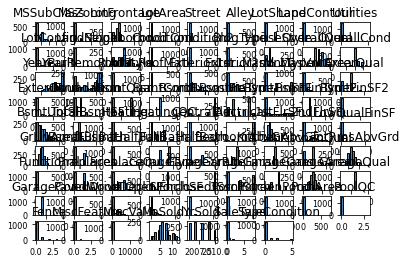

In [47]:
usable_df1.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.show()

$\underline{\textbf{Heatmaps}}$

[Text(0.5, 1.0, 'Heatmap of All Features')]

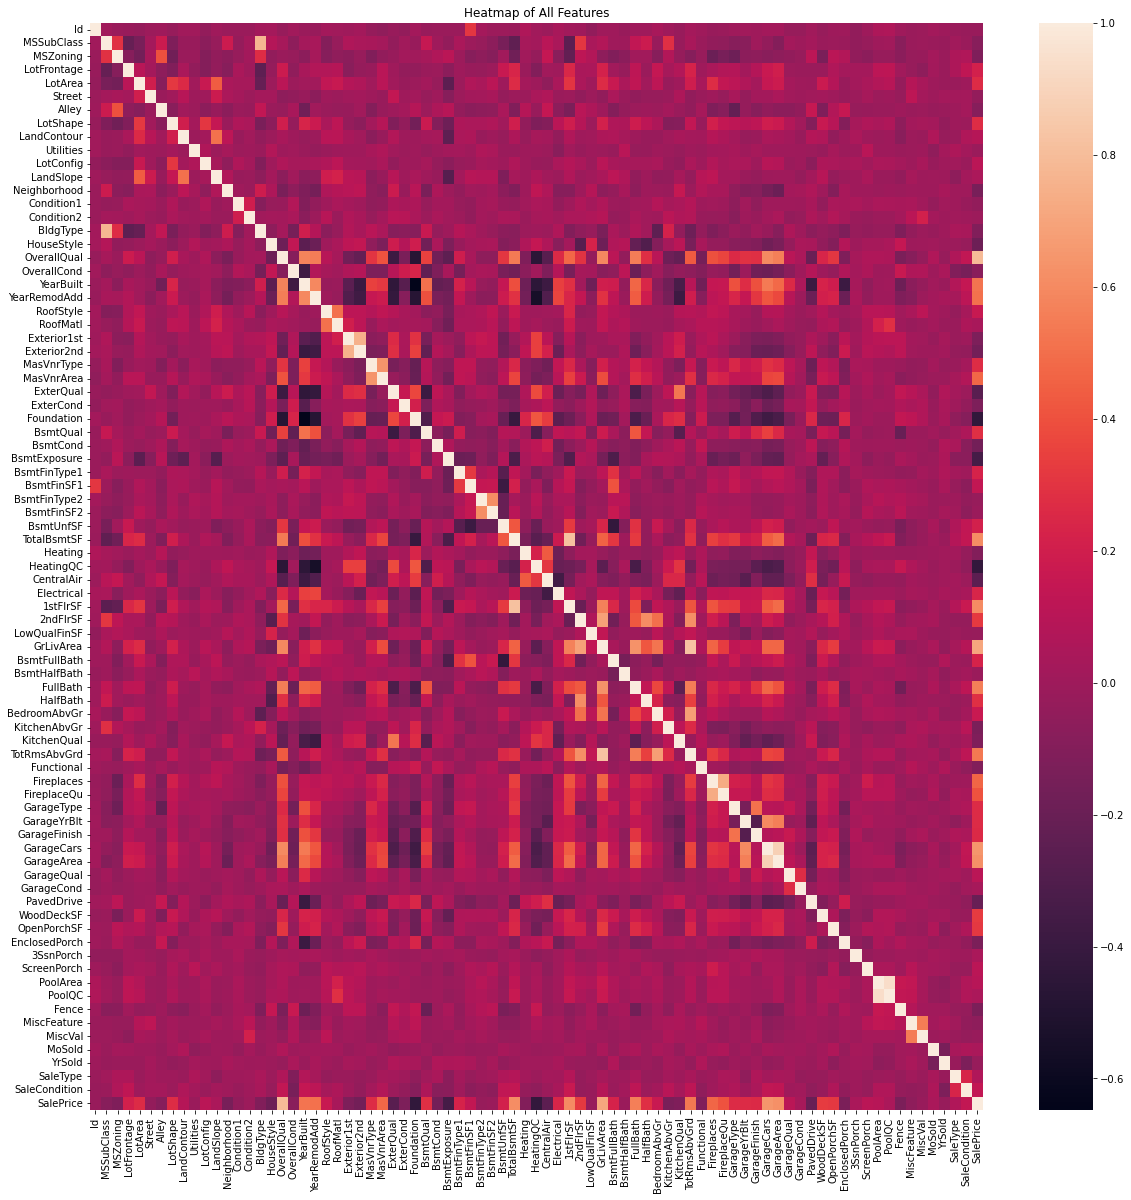

In [24]:
plt.figure(figsize=(20,20))
temp_df1 = df1.iloc[:,:-1]
temp_df1 = temp_df1.iloc[:,1:]
sns.heatmap(temp_df1.corr()).set(title='Heatmap of All Features')

[Text(0.5, 1.0, 'Heatmap of All Features After 40 PCA')]

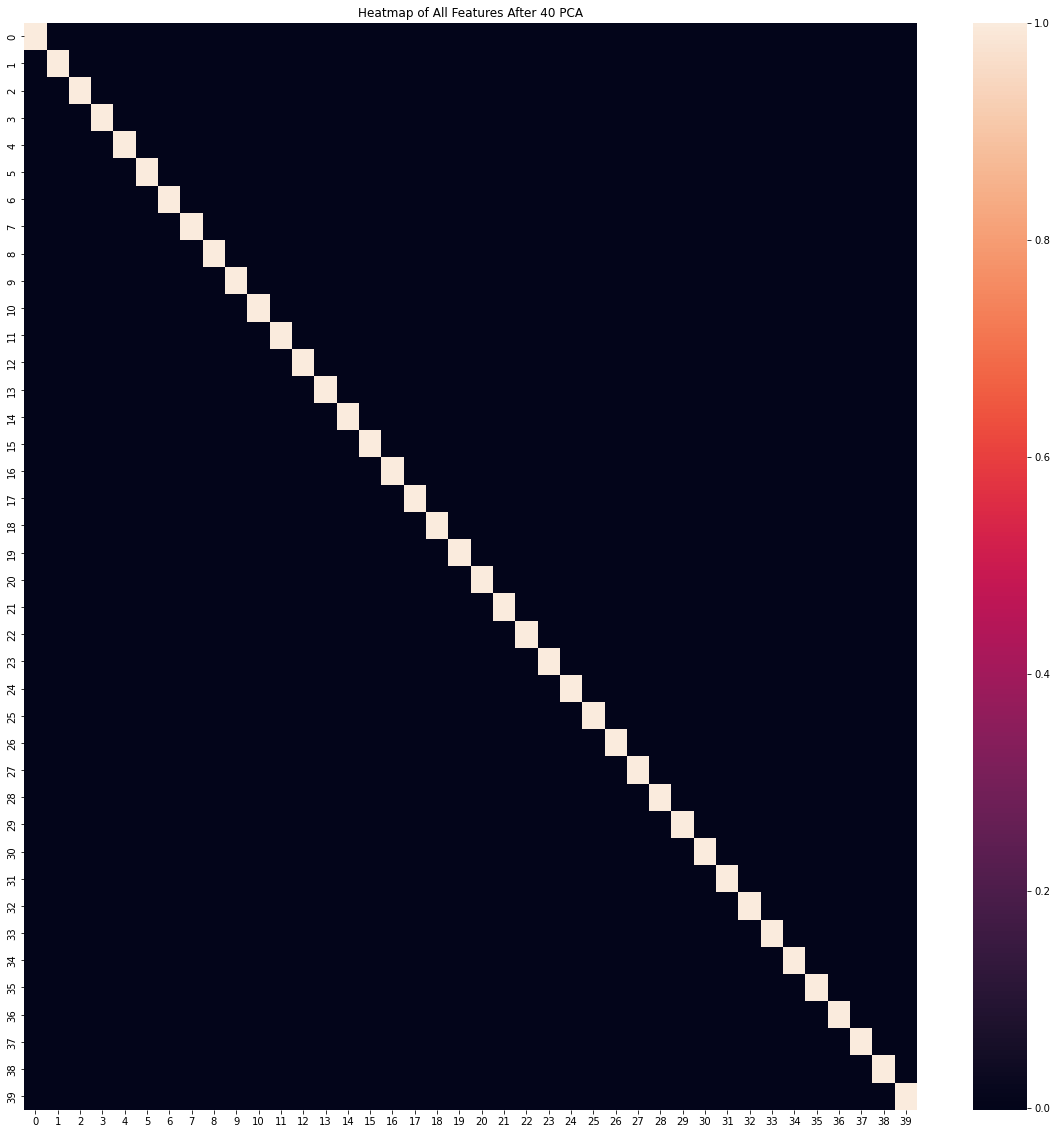

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(DF_40.corr()).set(title='Heatmap of All Features After 40 PCA')

$\underline{\large{\textbf{Visualization for Non-String Features}}}$

$\underline{\textbf{Histograms for Non-String Data}}$

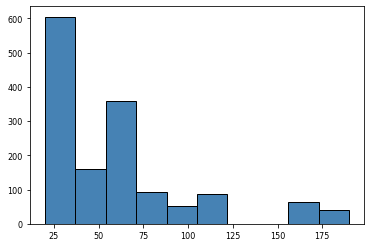

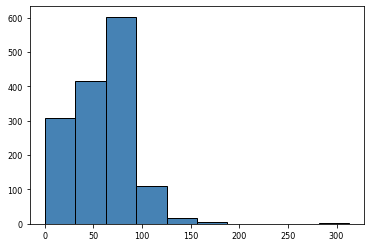

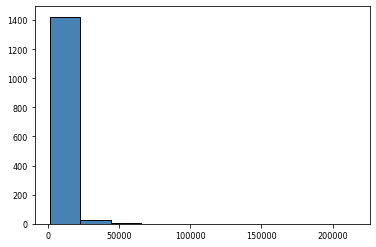

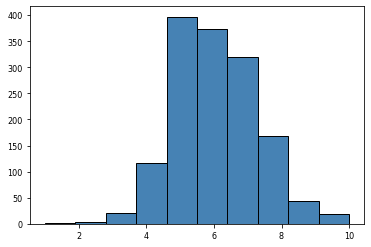

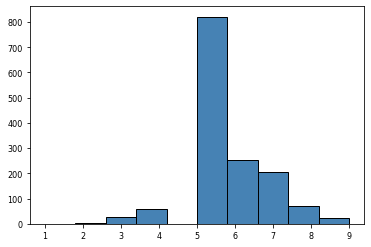

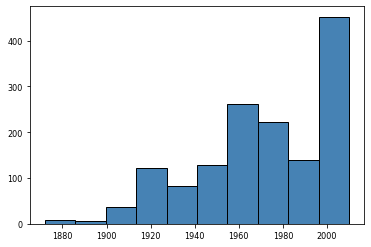

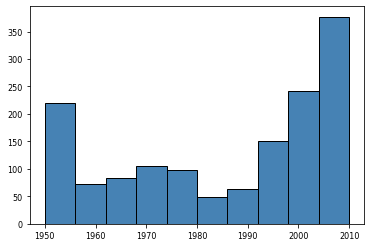

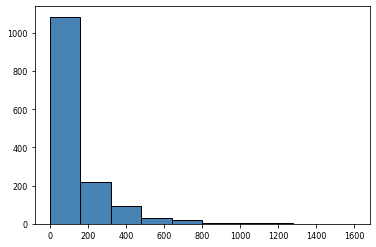

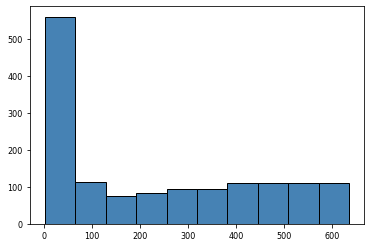

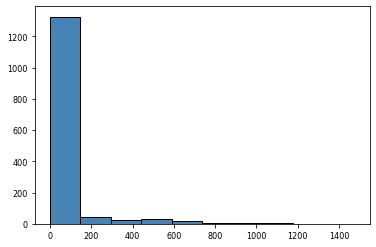

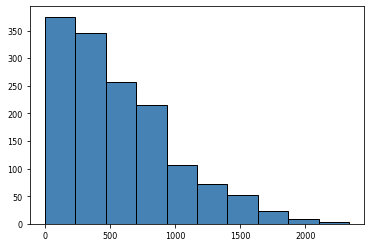

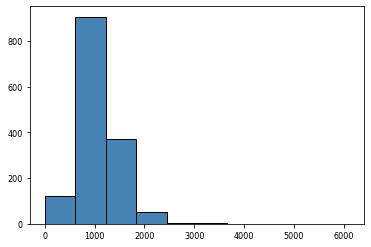

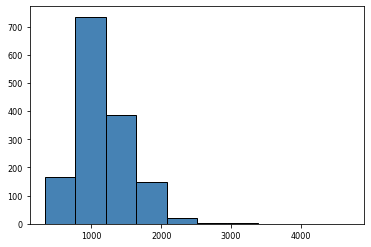

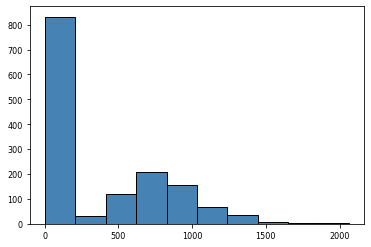

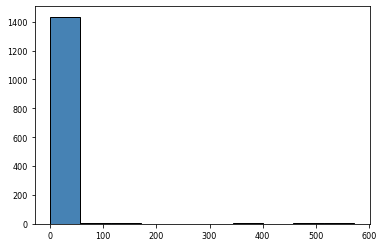

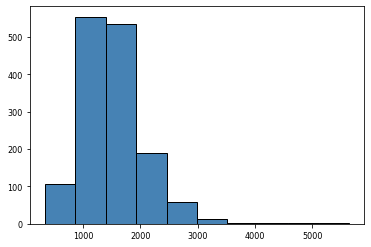

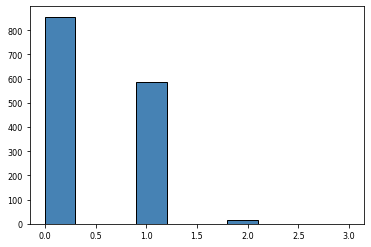

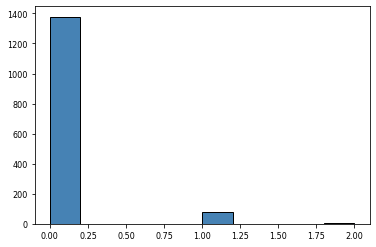

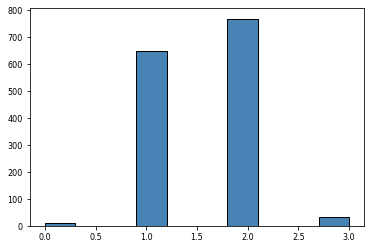

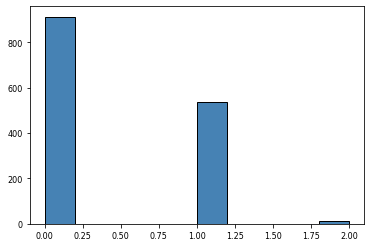

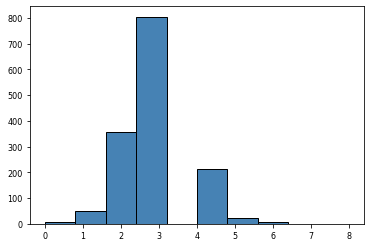

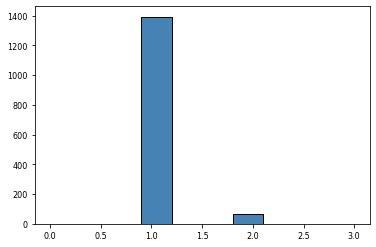

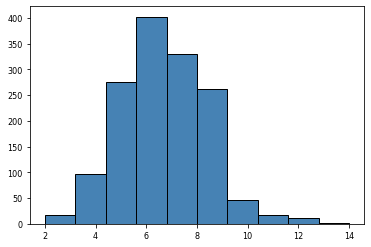

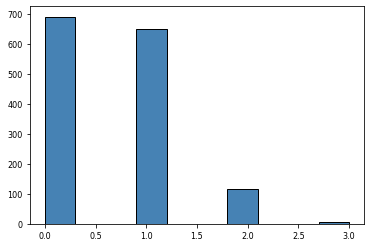

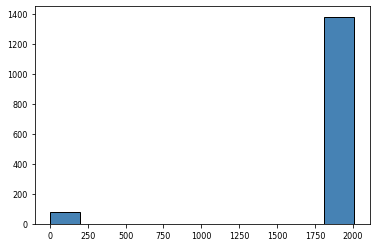

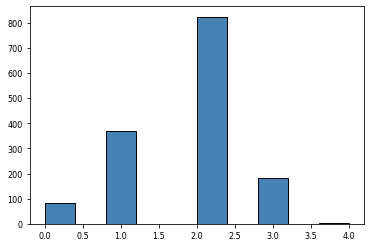

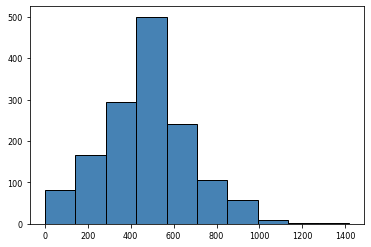

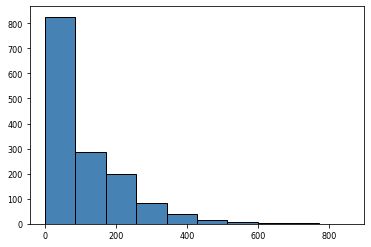

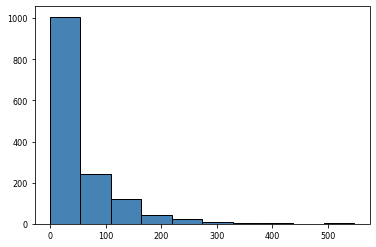

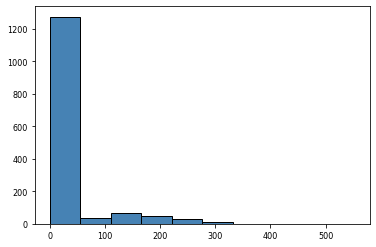

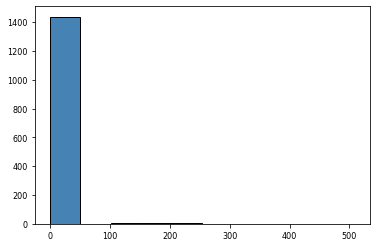

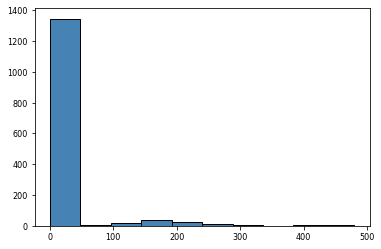

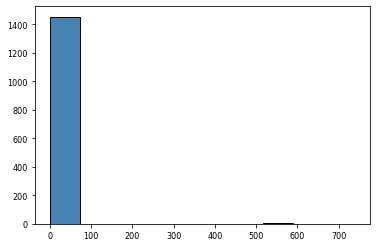

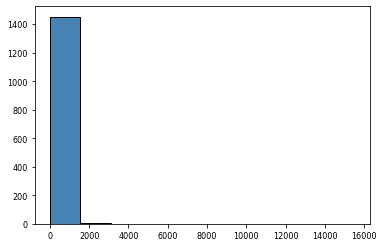

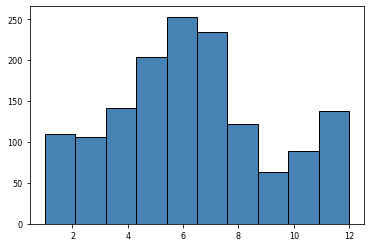

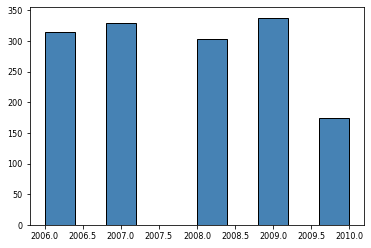

In [90]:
i = 0
for label in usable_df2.columns:
    usable_df2[label].hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)  
    plt.show()
    i += 1

$\underline{\textbf{Heatmaps}}$

[Text(0.5, 1.0, 'Heatmap of All Non-String Features')]

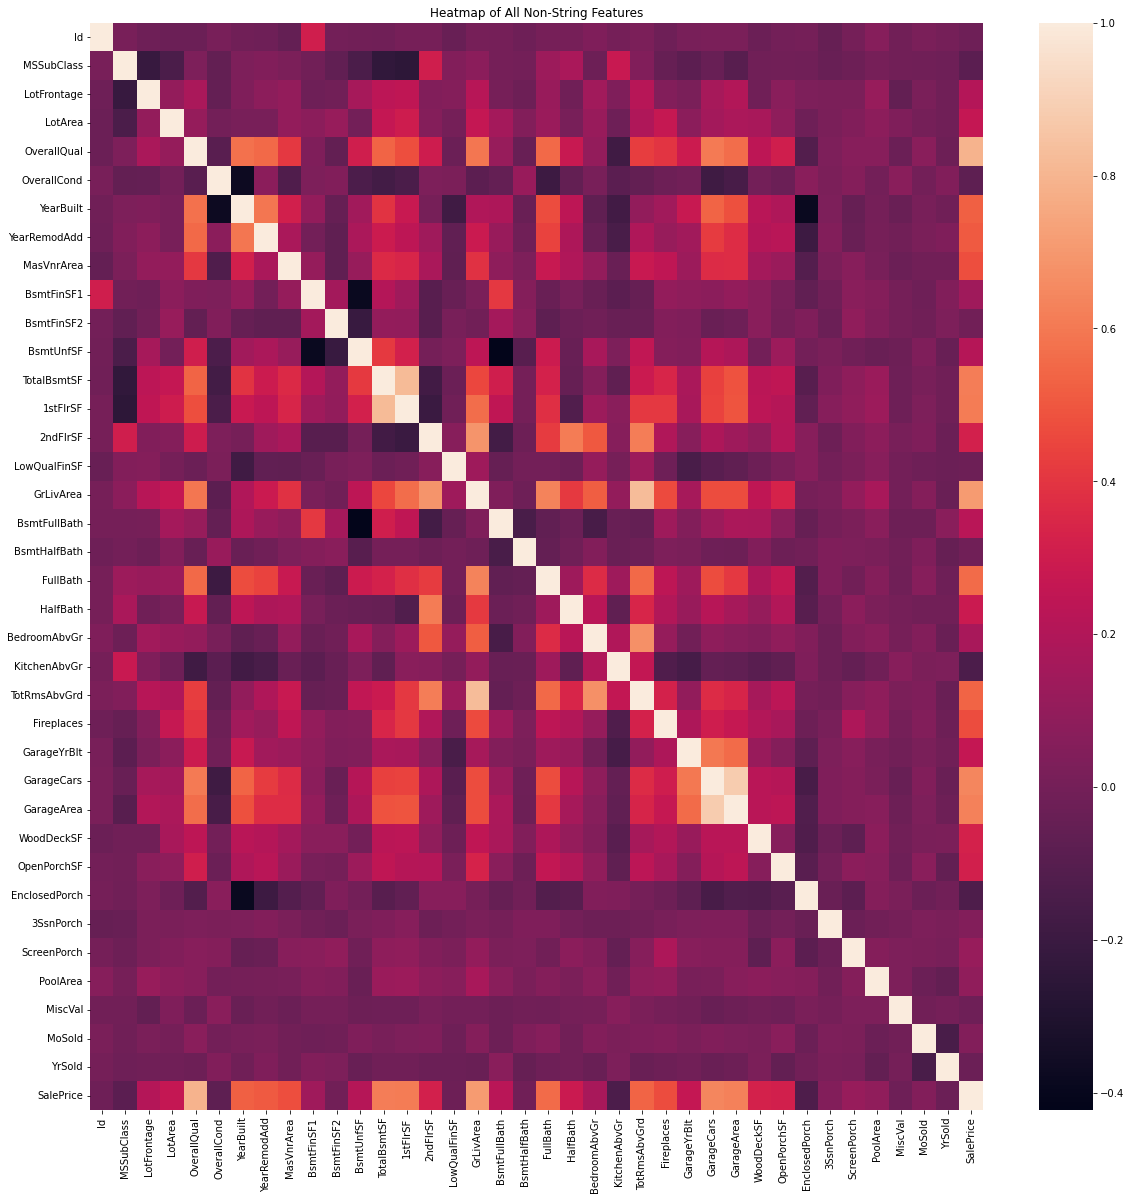

In [28]:
plt.figure(figsize=(20,20))
temp_df2 = df2.iloc[:,:-1]
temp_df2 = temp_df2.iloc[:,1:]
sns.heatmap(temp_df2.corr()).set(title='Heatmap of All Non-String Features')

[Text(0.5, 1.0, 'Heatmap of All Features After 10 PCA')]

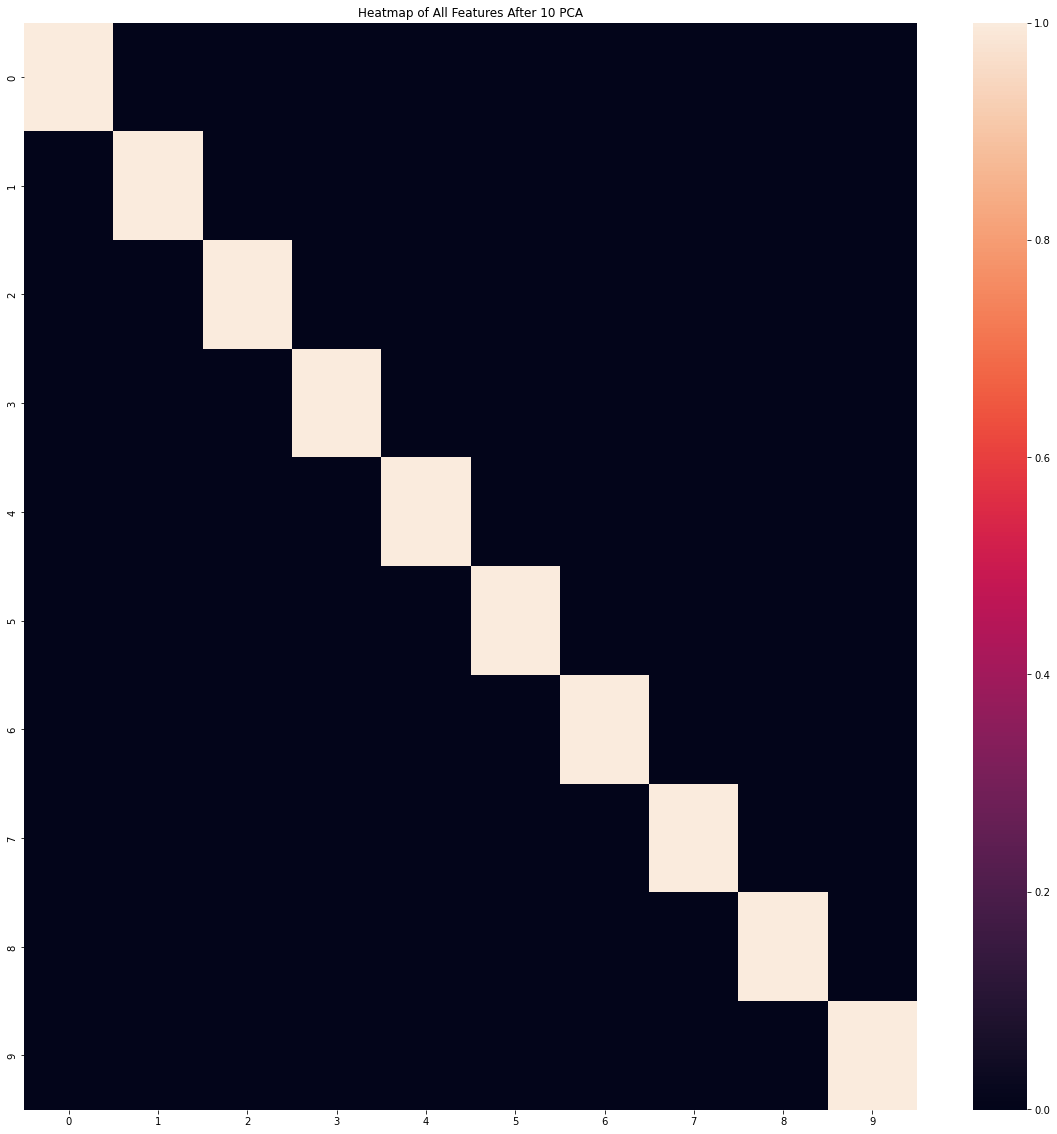

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(DF_10.corr()).set(title='Heatmap of All Features After 10 PCA')